In [1]:
from fastai.text import *   # Quick access to NLP functionality
from fastai.datasets import *
import pandas as pd
import numpy as np

In [53]:
gc.collect()

22

In [3]:
path = 'C:\\Users\\bokhy\\Desktop\\kaggle\\nlp-getting-started\\'
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

In [4]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, csv_name='train.csv', valid_pct=0.1, text_cols = 3, label_cols = 4 )

In [5]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, csv_name='train.csv', valid_pct=0.1, test='test.csv' ,vocab=data_lm.train_ds.vocab, text_cols = 3, label_cols = 4)

In [54]:
learn = language_model_learner(data_lm, arch = AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.472969,3.696898,0.384911,00:15


In [55]:
learn.unfreeze()
learn.fit(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.420731,3.191897,0.442277,00:21
1,3.115311,3.050473,0.464866,00:22


In [56]:
#save ENCODER
learn.save_encoder('ft_enc')

In [21]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7) 

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6851 items)
x: TextList
xxbos xxmaj demolish - deep space xxunk xxunk xxunk xxunk xxunk : xxunk,xxbos # xxup usgs m 1.2 - 23 km s of xxmaj twentynine xxmaj palms xxmaj california : xxmaj time2015 - 08 - 05 23:54:09 xxup utc2015 - 08 - 05 xxunk -07:0 ... http : / / t.co / xxunk # xxup sm,xxbos xxmaj it 's crazy how a phone can do so much damage to a person,xxbos xxmaj just added some more fire to the flames for xxmaj saturday ! xxmaj rick xxmaj wonder will be spinning a guest set along with xxmaj xxunk ... http : / / t.co / xxunk,xxbos xxunk not bad xxunk i 'd get rid of either hazard or xxunk for a better striker than xxunk
y: CategoryList
0,1,0,0,0
Path: C:\Users\bokhy\Desktop\kaggle\nlp-getting-started;

Valid: LabelList (762 items)
x: TextList
xxbos xxmaj air xxmaj group is here to the rescue ! xxmaj we have 24 / 7 xxmaj emergency xxmaj service ! xxmaj learn more about it here - http : / / t.co / xxunk http : / / t.co / xxunk,xxb

In [62]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6091 items)
x: TextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school,xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # cafire # wildfires
y: CategoryList
1,1,1,1,1
Path: C:\Users\bokhy\Desktop\kaggle\nlp-getting-started;

Valid: LabelList (1522 items)
x: TextList
xxbos xxmaj you happen to xxunk ' forget ' about how you xxmaj xxunk xxunk and ' xxunk ' mass murderer xxmaj baruch xxmaj goldstein . https : / / t.co / xxunk,xxbos # hot xxmaj funtenna : hijacking computers to send data as sound waves [ xxmaj black xxmaj hat 2015 ] h

In [14]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup u. xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : 030 / 6 .,0
xxbos xxup info xxup s. xxup wnd : 030 / 6 . xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1


In [15]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.513487,0.486787,0.784777,01:06


In [12]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.518960,0.440658,0.799737,01:02
1,0.477152,0.430712,0.806303,01:04
2,0.428805,0.438013,0.815496,01:05


In [13]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.407508,0.445808,0.802364,01:22
1,0.384903,0.447411,0.810243,01:25
2,0.318910,0.473546,0.801707,01:25


# Using DataBLock API

In [5]:
# This is a text databunch model (sames as above)
data_lm = (TextList.from_csv(path, 'train.csv', cols='text')
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=32))

In [9]:
data_lm.show_batch()

idx,text
0,xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk xxunk xxmaj colorado xxmaj springs areas xxbos i 'm on top of the hill and i can see a fire in the xxunk ... xxbos xxmaj there 's an emergency evacuation happening now in the building across the street xxbos i
1,https : / / t.co / e8dl1lncvu xxbos i xxunk the laws of the xxunk false xxunk xxunk nations xxunk self annihilation xxbos xxmaj the annihilation of xxmaj jeb xxmaj christie & & xxmaj xxunk is less than 24 hours away .. \n xxmaj please xxmaj god allow me at least one more full day ... xxbos xxunk xxmaj we need help - horses will die ! xxmaj please
2,xxunk the youth . http : / / t.co / xxunk xxbos xxmaj xxunk attacked from xxunk ( xxup xxunk - xxup home - xxup southern xxup my ) xxbos xxmaj christian xxmaj attacked by xxmaj muslims at the xxmaj temple xxmaj mount after xxmaj waving xxmaj israeli xxmaj flag via xxmaj pamela xxmaj geller - ... http : / / t.co / xxunk xxbos # xxup xxunk xxmaj remember
3,her ? ? xxbos xxmaj xxunk going 90 - 100 . xxmaj dude was xxunk up with me . xxmaj took the same exit . xxmaj pulled to the side and told me he blew his motor . xxmaj xxunk # xxunk xxbos xxmaj the universe might not actually exist scientists say http : / / t.co / xxunk ' xxmaj the # xxup sun blew up and the #
4,window early ... i got xxunk body bagging luck .. lol save the xxunk xxbos xxmaj has body xxunk * * xxup rt xxunk : xxmaj drake is body bagging meek xxbos drake been kept it the most hip hop during this xxunk and he fucking body bagging meek back to back ? ? xxbos xxmaj woke up to xxmaj drake body bagging xxmaj meek again ! ! xxmaj meek


In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


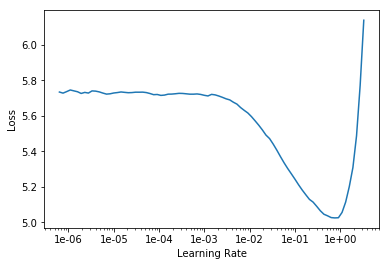

In [8]:
learn.recorder.plot()

In [10]:
# fine-tuning the last layers
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.305651,3.336517,0.435179,00:16


In [11]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')

epoch,train_loss,valid_loss,accuracy,time
0,3.063017,3.220171,0.450179,00:35
1,2.902263,3.113634,0.467411,00:35
2,2.718803,3.096049,0.474063,00:35
3,2.565361,3.112872,0.474866,00:35


In [12]:
learn.save_encoder('fine_tuned_enc')

In [5]:
# Try this later
# learn = language_model_learner(data_lm, Transformer, drop_mult=0.3)

# Classifer Model

In [59]:
data_clas = (TextList.from_csv(path, 'train.csv' ,vocab=data_lm.train_ds.vocab, cols = 'text') #grab all the text files in path
             # Vocab variable: we want to make sure that it uses exactly the same vocab that are used for the language model. 
             # If word number 10 was the in the language model, we need to make sure that word number 10 is the in the classifier. 
             # Because otherwise, the pre-trained model is going to be totally meaningless
             .split_by_rand_pct(0.2)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='target')
             #label them all with their folders
             .databunch(bs=32))

In [60]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos xxup info xxup u. xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : 030 / 6 .,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,1
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1


In [61]:
# creating a text classifier learner
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
# If you're overfitting, you can increase "drop_mult"

In [14]:
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6851 items)
x: TextList
xxbos xxunk she 's proper traumatised that pepper is ' dead ' i ca n't wait to see her face,xxbos xxmaj damn xxunk got blown up in that first inning,xxbos xxmaj mass murderer xxmaj xxunk xxmaj xxunk xxunk a woman in xxmaj north xxmaj korea http : / / t.co / xxunk ',xxbos xxmaj it was finally demolished in the spring of 2013 and the property has sat vacant since . xxmaj the justû _ : saddlebrooke ... http : / / t.co / xxmaj xxunk,xxbos xxup xxunk investigating fatal shooting of 3 year old child in southeast xxmaj anchorage http : / / t.co / xxunk
y: CategoryList
0,0,1,0,1
Path: C:\Users\bokhy\Desktop\kaggle\nlp-getting-started;

Valid: LabelList (762 items)
x: TextList
xxbos xxmaj xxunk frozen xxunk xxunk ? xxmaj have you had luck making them ? http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxmaj set some goals . xxmaj then demolish them ? ? # fitness # xxunk,xxbos xxunk survived because of magic she i

In [63]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


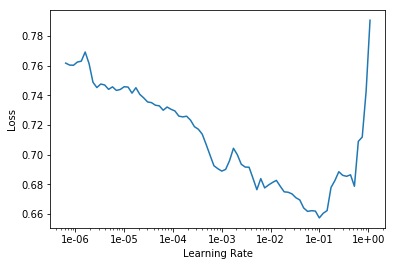

In [64]:
learn.recorder.plot()

In [65]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.527936,0.468439,0.789750,01:06


In [66]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.516826,0.459112,0.785808,01:03


In [67]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.462669,0.437580,0.808147,01:10


In [68]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.420577,0.431628,0.814717,02:04
1,0.399268,0.437841,0.810118,03:07
2,0.351582,0.441667,0.807490,02:52
3,0.340535,0.459946,0.793693,02:15


In [22]:
learn.save('Disaster',return_path=True)

WindowsPath('C:/Users/bokhy/Desktop/kaggle/nlp-getting-started/models/Disaster.pth')

In [23]:
learn.export('Disaster.pkl')

# Load Model

In [70]:
pred, _ = learn.get_preds('test.csv', ordered=True)

In [71]:
preds_prob, preds_class = pred.max(1)

In [ ]:
predict_df = test.text.apply(learn.predict)

c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 inpu

In [25]:
predict_df.head()

0    (1, tensor(1), [tensor(0.1503), tensor(0.8497)])
1    (1, tensor(1), [tensor(0.4117), tensor(0.5883)])
2    (1, tensor(1), [tensor(0.0172), tensor(0.9828)])
3    (1, tensor(1), [tensor(0.1660), tensor(0.8340)])
4    (1, tensor(1), [tensor(0.0024), tensor(0.9976)])
Name: text, dtype: object

In [ ]:
# or 
# predict_df = df.apply(learn.predict, axis=1)

In [27]:
predict_df_class = [x[0].obj for x in predict_df.values]
predict_df_prob = [max(x[2].tolist()) for x in predict_df.values]

In [29]:
print(preds_class[:10])

tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])


In [30]:
print(predict_df_class[:10])

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [31]:
print(preds_prob[:10])

tensor([0.8364, 0.5988, 0.9834, 0.8211, 0.9967, 0.6996, 0.8497, 0.8695, 0.7148,
        0.7171])


In [32]:
print(predict_df_prob[:10])

[0.849666953086853, 0.588326096534729, 0.9827507138252258, 0.8339917659759521, 0.9976490139961243, 0.7041558027267456, 0.8624056577682495, 0.8834949731826782, 0.7272297739982605, 0.7055497169494629]


In [44]:
sample_nr = 0
sample_text = test.iloc[sample_nr].text
print(learn.predict(sample_text))
print('{}, {}'.format(preds_class[sample_nr], pred[sample_nr]))

(Category 1, tensor(1), tensor([0.1503, 0.8497]))
1, tensor([0.1636, 0.8364])


c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


In [46]:
submission_df = pd.read_csv(os.path.join(path, 'sample_submission.csv'))

In [47]:
submission_df['target'] = predict_df_class

In [48]:
submission_df.target.value_counts()

0    1946
1    1317
Name: target, dtype: int64

In [49]:
submission_df.to_csv('submission.csv', index=False)

# Text Classification Interpretation

In [50]:
import matplotlib.cm as cm

txt_ci = TextClassificationInterpretation.from_learner(learn) # TextClassificationInterpretation can be used ONLY once we train a text classification model.
test_text = "I can't believe this happened to our neighbor"
txt_ci.show_intrinsic_attention(test_text,cmap=cm.Purples)

c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
..\aten\src\ATen\native\cuda\LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
..\aten\src\ATen\native\cuda\LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
..\aten\src\ATen\native\cuda\LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
..\aten\src\ATen\native\cuda\LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, t

In [51]:
txt_ci.show_top_losses(5) # If max_len=None, it will display all tokens.

Text,Prediction,Actual,Loss,Probability
xxbos xxunk xxmaj love what you picked ! xxmaj we 're playing xxup worth xxup it by xxup fifth xxup harm / xxup kid xxup ink because of you ! xxmaj listen & & xxmaj vote : http : / / t.co / 0wratka2jl,0,1,3.90,0.02
xxbos ? ? xxmaj new xxmaj ladies xxmaj shoulder xxmaj tote # xxmaj handbag xxmaj faux xxmaj leather xxmaj hobo xxmaj purse xxmaj cross xxmaj body xxmaj bag # xxmaj womens http : / / t.co / zujwuiomb3 http : / / t.co / xxunk,0,1,3.74,0.02
xxbos xxmaj police expand search for missing pregnant woman in xxmaj xxunk : xxmaj police in xxmaj xxunk - xxmaj saint - xxmaj xxunk are xxunk th ... http : / / t.co / xxunk,1,0,3.73,0.02
xxbos xxunk : xxmaj france agreed to repay xxmaj russia for two warships which were never xxunk after economic sanctions http : / / t.co / xxunk,1,0,3.71,0.02
xxbos xxmaj if you 're in search of powerful content to improve your business or have been xxunk with the deluge of ' xxunk : / / t.co / xxunk,0,1,3.14,0.04
